In [5]:
import psycopg2
from psycopg2.extras import RealDictCursor
import numpy as numpy
import pandas as pd

In [6]:
# Database credentials
hostname = "pgsql-siackathon.postgres.database.azure.com"
database = "postgres"
port = 5432
user = "siackathon"
password = "gFvwZjgL06u5uPyh7PnG"

In [7]:
connection = psycopg2.connect(
    host=hostname,
    database=database,
    user=user,
    password=password,
    port=port,
    sslmode='require'  # Ensures SSL connection
)
print("Connection to the database established successfully!")

Connection to the database established successfully!


In [8]:
query = "SELECT * FROM flotation_data;"
df = pd.read_sql_query(query, connection)
print("Data retrieved successfully!")

/tmp/ipykernel_13549/35777910.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Data retrieved successfully!


In [9]:
df.head()

,ts,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Cell Spin Factor,Bubble Size,...,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,% Iron Concentrate 2,% Silica Concentrate 2
0,2024-06-04 15:47:00,64.03,6.26,3207.44,369.93,398.93,10.07,1.66,0.91,0.7,...,AIR: 604.22,AIR: 602.45,AIR: 470.25,AIR: 466.92,439.31,416.30,66.6,0.99,66.37,1.11
1,2024-06-04 15:47:20,64.03,6.26,3174.54,368.40,398.09,10.07,1.66,0.92,0.7,...,AIR: 603.61,AIR: 602.26,AIR: 479.64,AIR: 468.7,481.11,404.62,66.6,0.99,66.37,1.11
2,2024-06-04 15:47:40,64.03,6.26,3152.38,367.10,397.00,10.07,1.66,0.92,0.7,...,AIR: 602.45,AIR: 601.7,AIR: 497.58,AIR: 478.08,518.56,402.08,66.6,0.99,66.37,1.11
3,2024-06-04 15:48:00,64.03,6.26,3142.07,366.22,395.51,10.07,1.66,0.92,0.7,...,AIR: 600.32,AIR: 600.52,AIR: 529.53,AIR: 500.09,548.21,415.40,66.6,0.99,66.37,1.11
4,2024-06-04 15:48:20,64.03,6.26,3119.82,366.91,395.51,10.07,1.66,0.93,0.7,...,AIR: 593.65,AIR: 600.73,AIR: 515.3,AIR: 498.63,540.13,458.12,66.6,0.99,66.37,1.11


In [10]:
df.shape

(717453, 30)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717453 entries, 0 to 717452
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   ts                            717453 non-null  datetime64[ns]
 1   % Iron Feed                   717453 non-null  object        
 2   % Silica Feed                 717453 non-null  object        
 3   Starch Flow                   712040 non-null  float64       
 4   Amina Flow                    715198 non-null  float64       
 5   Ore Pulp Flow                 712040 non-null  float64       
 6   Ore Pulp pH                   715198 non-null  float64       
 7   Ore Pulp Density              712040 non-null  float64       
 8   Cell Spin Factor              717453 non-null  float64       
 9   Bubble Size                   717453 non-null  float64       
 10  Iron Binding Agent (kg)       715169 non-null  float64       
 11  Binder Activa

In [13]:
df.describe()

,ts,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Cell Spin Factor,Bubble Size,Iron Binding Agent (kg),Binder Activator (kg),...,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,% Iron Concentrate 2,% Silica Concentrate 2
count,717453,712040.000000,715198.000000,712040.000000,715198.000000,712040.000000,717453.000000,717453.000000,715169.000000,717453.000000,...,717453.000000,717453.000000,717453.000000,717453.000000,717453.000000,717453.000000,717453.000000,717453.000000,717453.000000,717279.000000
mean,2022-01-21 14:59:49.986020096,2869.542951,487.668513,397.523527,9.777904,1.681211,14711.366255,14711.253526,23.125863,5.349157,...,299.438034,299.883544,291.475486,290.659986,430.889541,421.896893,65.062250,2.325164,63.640138,2.534751
min,1824-05-03 01:19:40,0.000000,241.670000,376.250000,8.750000,1.520000,0.500000,0.000000,8.220000,1.850000,...,292.200000,286.300000,192.210000,185.960000,155.840000,175.350000,62.050000,0.600000,56.050000,0.400000
25%,2024-05-07 07:14:00,2074.997500,431.360000,394.440000,9.540000,1.650000,0.940000,0.500000,20.190000,4.750000,...,298.260000,298.040000,257.080000,255.020000,358.880000,357.290000,64.390000,1.430000,62.410000,1.710000
50%,2024-06-18 07:47:00,3011.230000,504.010000,399.230000,9.810000,1.700000,1.030000,0.800000,23.890000,5.500000,...,299.800000,299.860000,299.400000,299.000000,428.060000,412.850000,65.230000,2.000000,63.850000,2.320000
75%,2024-07-30 08:30:20,3729.770000,552.930000,402.830000,10.050000,1.730000,1.110000,1.300000,26.170000,6.100000,...,300.630000,301.700000,302.690000,301.810000,493.550000,477.860000,65.880000,3.010000,65.120000,3.220000
max,2024-09-10 08:53:00,6300.230000,739.540000,418.640000,10.810000,1.850000,999999.000000,999999.000000,39.070000,8.490000,...,305.870000,310.270000,370.910000,371.590000,698.860000,659.900000,68.010000,5.530000,68.510000,6.530000
std,NaN,1215.492725,91.225291,9.423765,0.385023,0.069259,120390.771062,120390.784837,4.373404,1.042219,...,2.583927,3.644562,29.620877,28.374686,89.771145,85.074760,1.120921,1.131899,1.939298,1.064615


In [12]:
# Select columns of type float64
float64_columns = df.select_dtypes(include=['float64']).columns

# Display the column names
print("Columns of type float64:", float64_columns)

Columns of type float64: Index(['Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH',
       'Ore Pulp Density', 'Cell Spin Factor', 'Bubble Size',
       'Iron Binding Agent (kg)', 'Binder Activator (kg)',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 06 Level',
       'Flotation Column 07 Level', '% Iron Concentrate',
       '% Silica Concentrate', '% Iron Concentrate 2',
       '% Silica Concentrate 2'],
      dtype='object')


In [13]:
df.columns

Index(['ts', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density', 'Cell Spin Factor',
       'Bubble Size', 'Iron Binding Agent (kg)', 'Binder Activator (kg)',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate', '% Iron Concentrate 2',
       '% Silica Concentrate 2'],
      dtype='object')

In [24]:
object_columns = list(set(list(df.columns)) - set(list(float64_columns)) - set(['ts']) - set(['% Iron Concentrate', '% Silica Concentrate', '% Iron Concentrate 2',
       '% Silica Concentrate 2']))

In [25]:
object_columns

['% Silica Feed',
 'Flotation Column 01 Level',
 '% Iron Feed',
 'Flotation Column 04 Level',
 'Flotation Column 05 Level',
 'Flotation Column 03 Level',
 'Flotation Column 02 Level']

In [46]:
df_ts = df['ts']
df_float = df[float64_columns]
df_object = df[object_columns]
target_columns = ['% Iron Concentrate', '% Silica Concentrate', '% Iron Concentrate 2', '% Silica Concentrate 2']
df_target = df[target_columns]

In [29]:
df_ts

0        2024-03-15 05:53:00
1        2024-03-15 05:53:20
2        2024-03-15 05:53:40
3        2024-03-15 05:54:00
4        2024-03-15 05:54:20
                 ...        
717448   2024-03-15 05:51:20
717449   2024-03-15 05:51:40
717450   2024-03-15 05:52:00
717451   2024-03-15 05:52:20
717452   2024-03-15 05:52:40
Name: ts, Length: 717453, dtype: datetime64[ns]

In [30]:
df_float

,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Cell Spin Factor,Bubble Size,Iron Binding Agent (kg),Binder Activator (kg),Flotation Column 01 Air Flow,...,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,% Iron Concentrate 2,% Silica Concentrate 2
0,3228.22,617.92,406.17,9.71,1.76,1.11,0.9,26.95,6.67,249.52,...,295.1,306.4,250.40,251.06,586.27,584.09,66.63,1.34,66.96,1.82
1,3228.52,623.54,401.43,9.71,1.76,1.11,0.9,27.04,6.67,249.56,...,295.1,306.4,250.44,248.82,596.57,586.30,66.63,1.34,66.96,1.82
2,3218.55,617.31,406.00,9.71,1.77,1.10,0.9,27.15,6.67,249.43,...,295.1,306.4,250.31,248.77,539.56,521.74,66.63,1.34,66.96,1.82
3,3205.18,623.54,406.35,9.71,1.77,1.10,0.9,27.31,6.67,249.04,...,295.1,306.4,250.62,251.24,517.27,495.37,66.63,1.34,66.96,1.82
4,3196.48,622.19,396.21,9.71,1.77,1.10,0.9,27.31,6.67,249.48,...,295.1,306.4,250.53,249.17,555.58,523.18,66.63,1.34,66.96,1.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717448,3147.66,619.87,402.89,9.69,1.76,1.10,0.9,26.43,6.67,250.75,...,295.1,306.4,251.15,248.25,547.07,551.98,66.63,1.34,66.96,1.82
717449,3139.84,630.00,398.73,9.70,1.76,1.10,0.9,26.51,6.67,250.53,...,295.1,306.4,250.31,252.16,570.59,570.19,66.63,1.34,66.96,1.82
717450,3176.86,621.58,404.00,9.70,1.76,1.11,0.9,26.56,6.67,249.96,...,295.1,306.4,250.22,248.73,563.53,557.60,66.63,1.34,66.96,1.82
717451,3196.88,618.90,403.12,9.70,1.76,1.11,0.9,26.65,6.67,249.83,...,295.1,306.4,250.44,250.44,540.01,533.11,66.63,1.34,66.96,1.82


In [31]:
df_object

,% Silica Feed,Flotation Column 01 Level,% Iron Feed,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 03 Level,Flotation Column 02 Level
0,16.98,AIR: 554.54,55.2,AIR: 523.05,AIR: 541.75,AIR: 544.52,AIR: 546.58
1,16.98,AIR: 560.95,55.2,AIR: 538.36,AIR: 544.61,AIR: 551.1,AIR: 556.21
2,16.98,AIR: 565.35,55.2,AIR: 559.06,AIR: 538.66,AIR: 553.9,AIR: 557.23
3,16.98,AIR: 545.23,55.2,AIR: 550.78,AIR: 543.62,AIR: 551.53,AIR: 550.88
4,16.98,AIR: 538.83,55.2,AIR: 547.66,AIR: 547.04,AIR: 535.78,AIR: 545.79
...,...,...,...,...,...,...,...
717448,16.98,AIR: 535.82,55.2,AIR: 541.09,AIR: 539.1,AIR: 546.14,AIR: 553.26
717449,16.98,AIR: 540.63,55.2,AIR: 555.78,AIR: 547.92,AIR: 543.76,AIR: 542.73
717450,16.98,AIR: 542.83,55.2,AIR: 574.22,AIR: 550.67,AIR: 558.43,AIR: 547.04
717451,16.98,AIR: 545.83,55.2,AIR: 549.61,AIR: 546.81,AIR: 552.71,AIR: 546.59


In [37]:
df_missing = df[df.isnull().any(axis=1)]

In [39]:
# Identify columns with missing values
columns_with_missing = df_missing.columns[df_missing.isnull().any()].tolist()

# Create a DataFrame with only those columns
df_missing_filtered = df_missing[columns_with_missing]

In [40]:
df_missing_filtered

,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Iron Binding Agent (kg),% Silica Concentrate 2
9,3242.97,NaN,395.16,NaN,1.77,NaN,1.82
28,3425.68,NaN,396.62,NaN,1.77,NaN,1.74
44,NaN,625.73,NaN,9.72,NaN,27.49,1.74
178,NaN,616.00,NaN,10.05,NaN,26.24,1.74
189,NaN,627.56,NaN,10.06,NaN,26.97,1.74
...,...,...,...,...,...,...,...
716943,3611.62,NaN,394.72,NaN,1.71,NaN,1.56
716970,3676.46,NaN,398.56,NaN,1.72,NaN,1.56
716984,NaN,591.67,NaN,10.11,NaN,26.09,1.56
717095,3231.25,NaN,392.87,NaN,1.74,NaN,1.56


In [41]:
df_without_nulls = df.dropna()

In [42]:
df_without_nulls.shape

(709629, 30)

In [44]:
df_without_nulls.shape[0] / df.shape[0] * 100

98.90947560327994

### Unique Value and Distribution:

In [55]:
list(float64_columns)

['Starch Flow',
 'Amina Flow',
 'Ore Pulp Flow',
 'Ore Pulp pH',
 'Ore Pulp Density',
 'Cell Spin Factor',
 'Bubble Size',
 'Iron Binding Agent (kg)',
 'Binder Activator (kg)',
 'Flotation Column 01 Air Flow',
 'Flotation Column 02 Air Flow',
 'Flotation Column 03 Air Flow',
 'Flotation Column 04 Air Flow',
 'Flotation Column 05 Air Flow',
 'Flotation Column 06 Air Flow',
 'Flotation Column 07 Air Flow',
 'Flotation Column 06 Level',
 'Flotation Column 07 Level',
 '% Iron Concentrate',
 '% Silica Concentrate',
 '% Iron Concentrate 2',
 '% Silica Concentrate 2']

In [56]:
df_float_tgt = df_without_nulls[list(float64_columns)]

In [57]:
df_tgt = df_float_tgt[target_columns]

In [58]:
df_tgt

,% Iron Concentrate,% Silica Concentrate,% Iron Concentrate 2,% Silica Concentrate 2
0,66.63,1.34,66.96,1.82
1,66.63,1.34,66.96,1.82
2,66.63,1.34,66.96,1.82
3,66.63,1.34,66.96,1.82
4,66.63,1.34,66.96,1.82
...,...,...,...,...
717448,66.63,1.34,66.96,1.82
717449,66.63,1.34,66.96,1.82
717450,66.63,1.34,66.96,1.82
717451,66.63,1.34,66.96,1.82


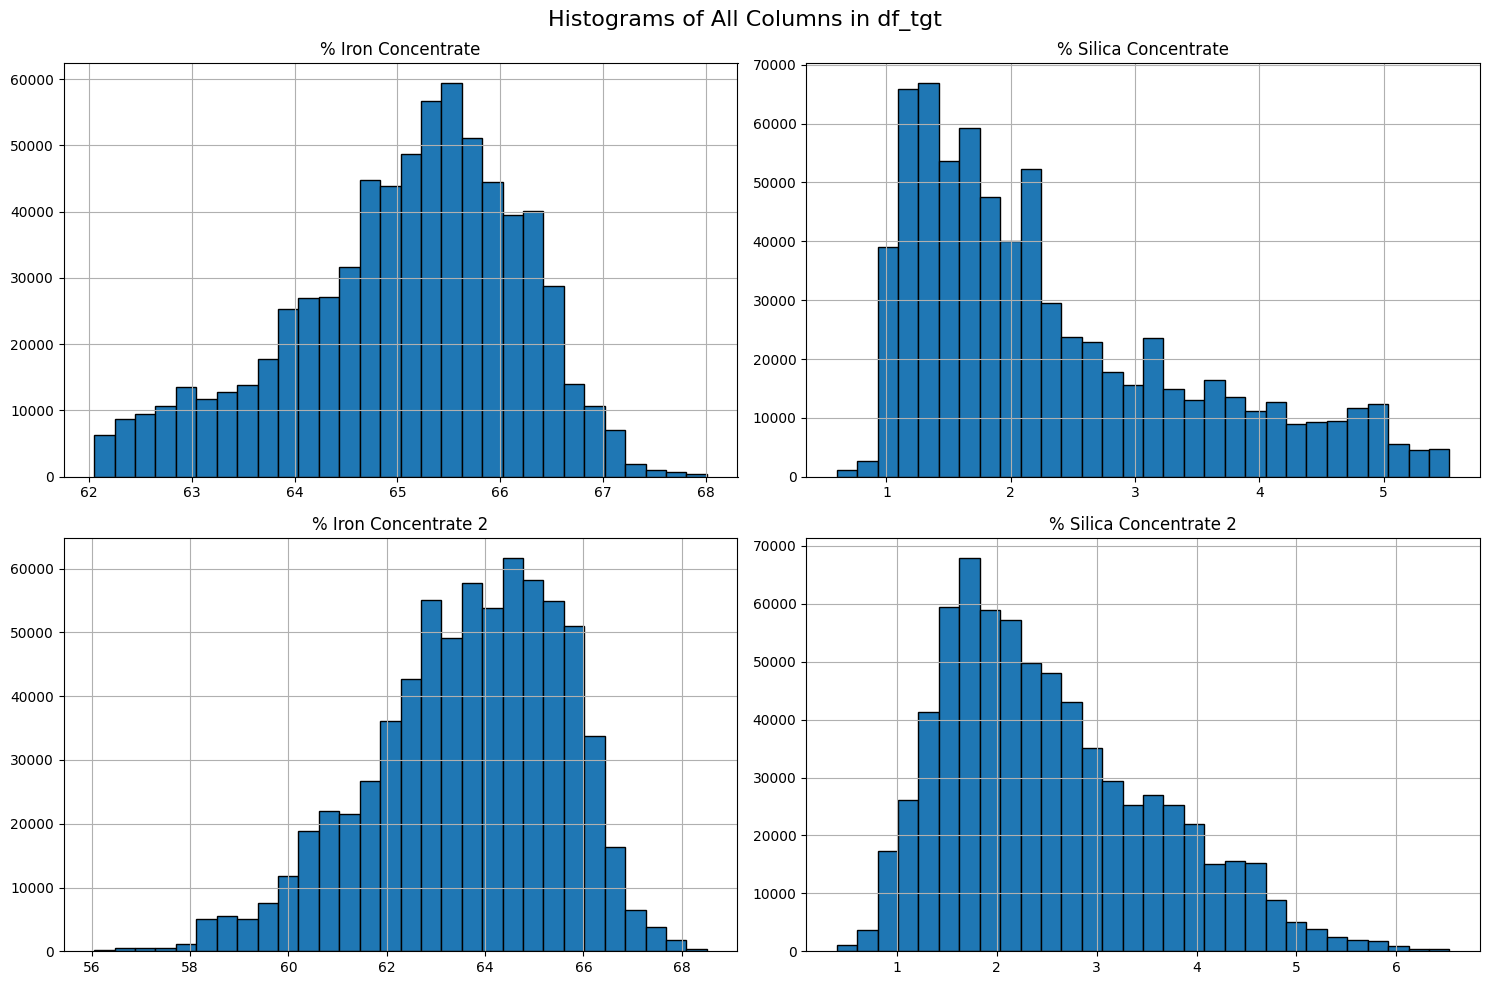

In [60]:
import matplotlib.pyplot as plt

# Plot histograms for each column in the DataFrame
df_tgt.hist(figsize=(15, 10), bins=30, edgecolor='black')

# Add a title to the plot
plt.suptitle('Histograms of All Columns in df_tgt', fontsize=16)

# Display the plots
plt.tight_layout()
plt.show()


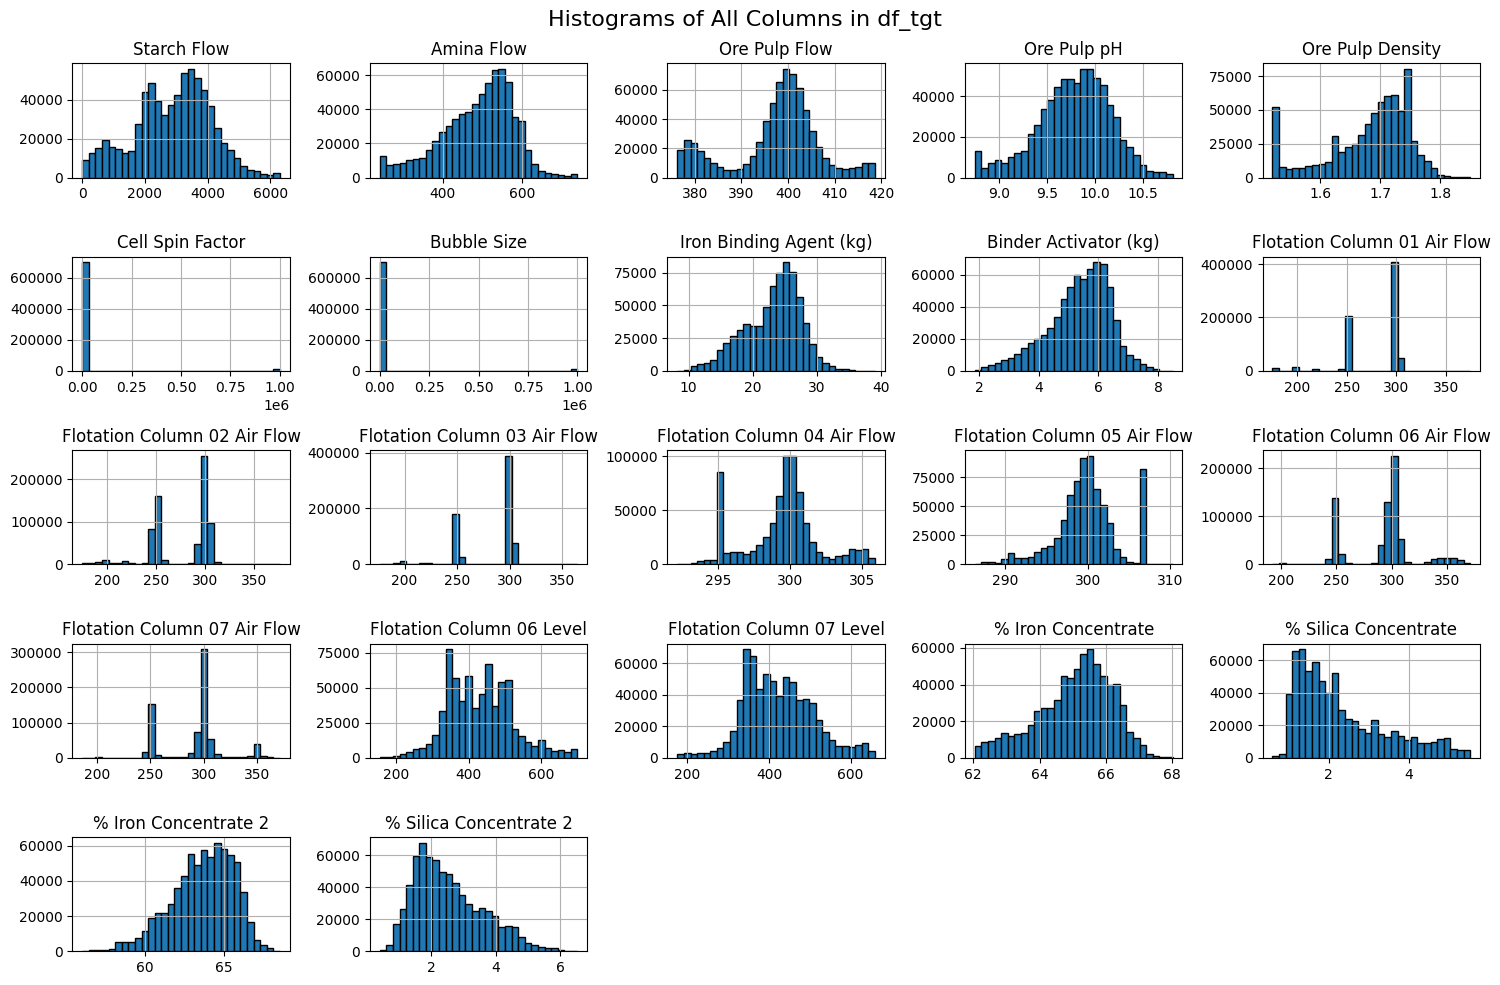

In [62]:
df_float_tgt.hist(figsize=(15, 10), bins=30, edgecolor='black')

# Add a title to the plot
plt.suptitle('Histograms of All Columns in df_tgt', fontsize=16)

# Display the plots
plt.tight_layout()
plt.show()

### Correlation:

In [63]:
df_float_tgt.corr()

,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Cell Spin Factor,Bubble Size,Iron Binding Agent (kg),Binder Activator (kg),Flotation Column 01 Air Flow,...,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,% Iron Concentrate 2,% Silica Concentrate 2
Starch Flow,1.000000,0.251198,0.027390,0.269144,0.218931,-0.000707,-0.000707,0.176298,0.223368,0.180236,...,0.091115,-0.100134,0.207711,0.186949,-0.061958,-0.028046,0.064872,-0.062074,0.209641,-0.078636
Amina Flow,0.251198,1.000000,0.190795,0.128745,0.660470,-0.001496,-0.001496,0.605615,0.814195,0.107072,...,0.014269,-0.053753,0.111773,0.076565,-0.194274,-0.162739,-0.112606,0.160180,0.209610,0.164757
Ore Pulp Flow,0.027390,0.190795,1.000000,0.127995,-0.001995,-0.001939,-0.001940,0.654615,0.506975,-0.166343,...,-0.176066,0.154502,-0.203043,-0.167689,0.003198,0.037281,0.077222,0.015904,0.327057,0.021319
Ore Pulp pH,0.269144,0.128745,0.127995,1.000000,0.102653,0.000058,0.000058,0.172432,0.175919,0.173874,...,0.158482,-0.134852,0.137767,0.181900,-0.084757,0.012236,0.188029,-0.150134,0.310627,-0.155179
Ore Pulp Density,0.218931,0.660470,-0.001995,0.102653,1.000000,0.000672,0.000672,0.458685,0.579550,-0.017503,...,-0.100291,0.040131,-0.042510,-0.067822,-0.094868,-0.081578,0.004267,0.054610,0.262621,0.116526
Cell Spin Factor,-0.000707,-0.001496,-0.001939,0.000058,0.000672,1.000000,1.000000,-0.000546,-0.000857,-0.001674,...,-0.003346,0.002783,-0.001418,-0.001852,0.000393,-0.000134,0.002496,-0.001307,0.001709,-0.001621
Bubble Size,-0.000707,-0.001496,-0.001940,0.000058,0.000672,1.000000,1.000000,-0.000547,-0.000857,-0.001674,...,-0.003347,0.002783,-0.001418,-0.001852,0.000394,-0.000133,0.002496,-0.001307,0.001709,-0.001620
Iron Binding Agent (kg),0.176298,0.605615,0.654615,0.172432,0.458685,-0.000546,-0.000547,1.000000,0.913748,-0.103725,...,-0.183377,0.139780,-0.115857,-0.108984,-0.111119,-0.055358,0.029013,0.051971,0.432898,0.016833
Binder Activator (kg),0.223368,0.814195,0.506975,0.175919,0.579550,-0.000857,-0.000857,0.913748,1.000000,-0.013776,...,-0.112314,0.064601,-0.019923,-0.032644,-0.164696,-0.109541,-0.034073,0.109666,0.384654,0.088397
Flotation Column 01 Air Flow,0.180236,0.107072,-0.166343,0.173874,-0.017503,-0.001674,-0.001674,-0.103725,-0.013776,1.000000,...,0.477824,-0.231436,0.656684,0.643806,-0.096114,-0.090037,0.092566,-0.212227,0.073336,-0.230708


In [64]:
import seaborn as sns

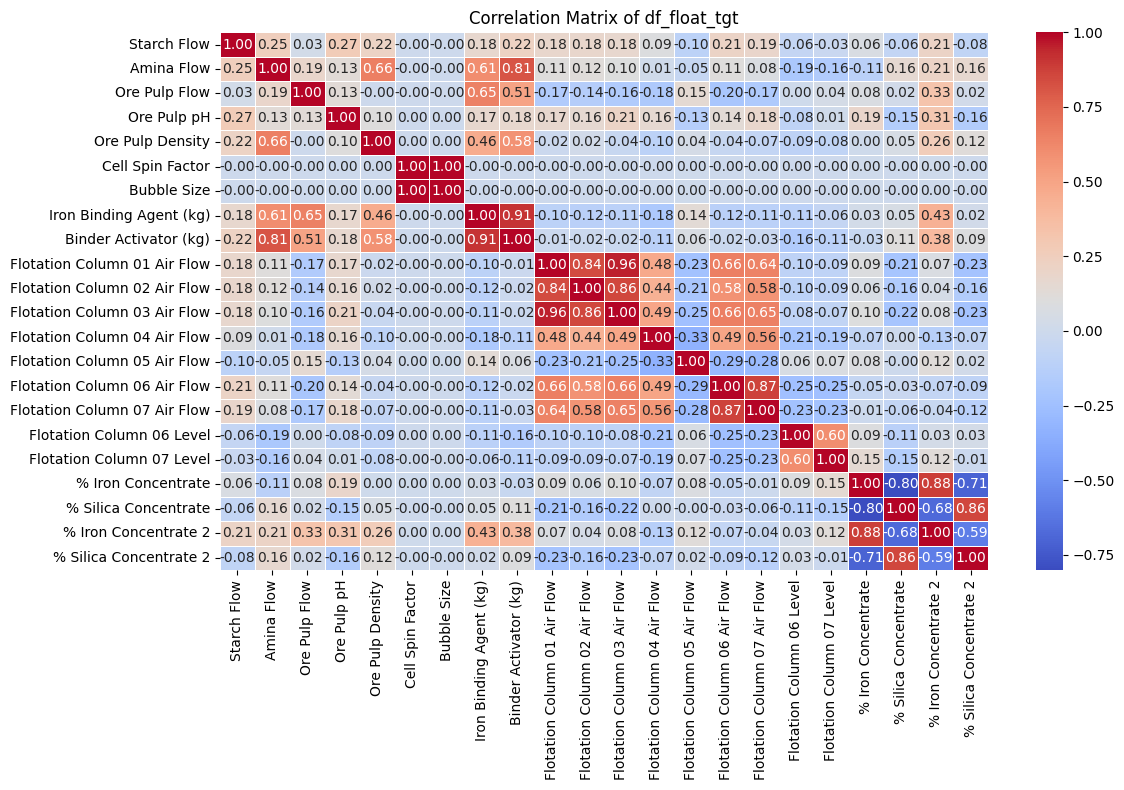

In [66]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_float_tgt.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Add a title to the plot
plt.title('Correlation Matrix of df_float_tgt')

# Show the plot
plt.tight_layout()
plt.show()

Removing cell spin factor and bubble size.

In [86]:
cat_variables = df.select_dtypes(include=['object']).columns
df_filtered = df[df['% Iron Feed'] != 'ERROR']
for col in cat_variables[2:]:
    df_filtered[col] = df_filtered[col].apply(lambda x: x[5:])
df_filtered[cat_variables] = df_filtered[cat_variables].apply(pd.to_numeric, errors='coerce')

/tmp/ipykernel_26676/1407305957.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col] = df_filtered[col].apply(lambda x: x[5:])
/tmp/ipykernel_26676/1407305957.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[cat_variables] = df_filtered[cat_variables].apply(pd.to_numeric, errors='coerce')


In [87]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 703764 entries, 0 to 717452
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   ts                            703764 non-null  datetime64[ns]
 1   % Iron Feed                   703764 non-null  float64       
 2   % Silica Feed                 703764 non-null  float64       
 3   Starch Flow                   698456 non-null  float64       
 4   Amina Flow                    701535 non-null  float64       
 5   Ore Pulp Flow                 698456 non-null  float64       
 6   Ore Pulp pH                   701535 non-null  float64       
 7   Ore Pulp Density              698456 non-null  float64       
 8   Cell Spin Factor              703764 non-null  float64       
 9   Bubble Size                   703764 non-null  float64       
 10  Iron Binding Agent (kg)       701508 non-null  float64       
 11  Binder Activator (

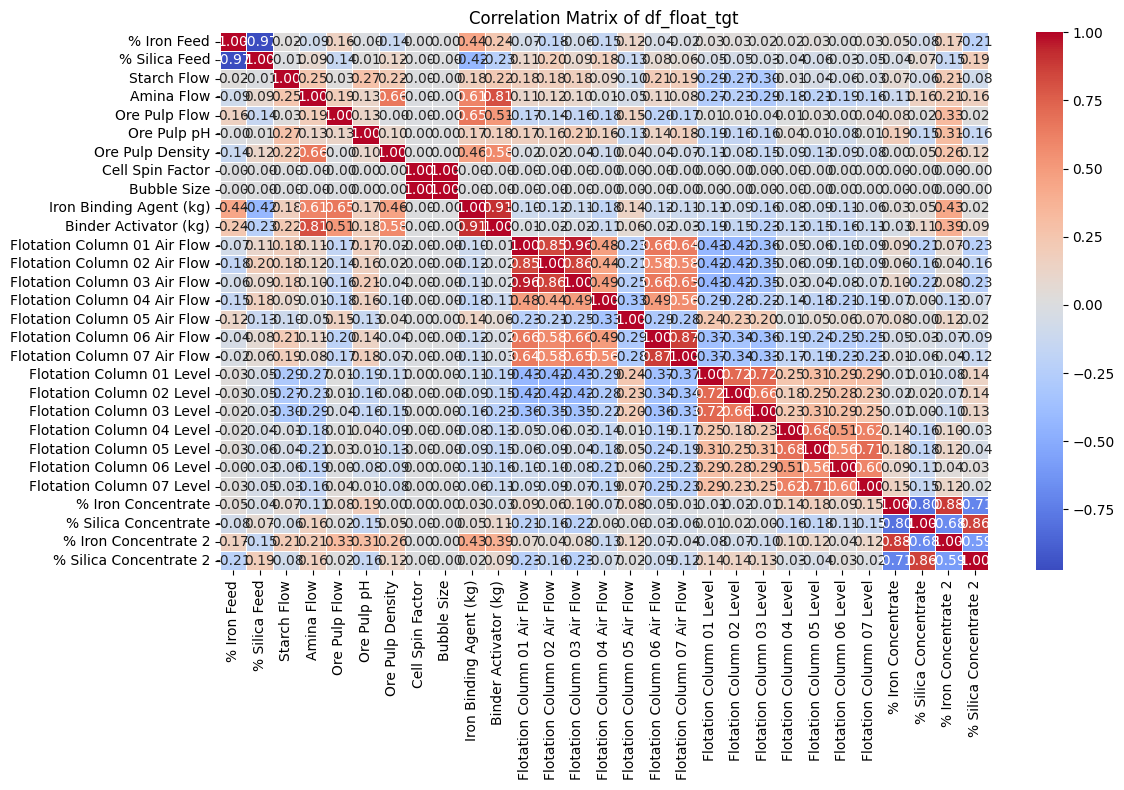

In [88]:
df_filtered_without_ts = df_filtered.drop(columns=['ts'])

plt.figure(figsize=(12, 8))
sns.heatmap(df_filtered_without_ts.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Add a title to the plot
plt.title('Correlation Matrix of df_float_tgt')

# Show the plot
plt.tight_layout()
plt.show()

In [89]:
df_filtered_without_ts.columns

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density', 'Cell Spin Factor',
       'Bubble Size', 'Iron Binding Agent (kg)', 'Binder Activator (kg)',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate', '% Iron Concentrate 2',
       '% Silica Concentrate 2'],
      dtype='object')

In [90]:
df_filtered_without_ts = df_filtered_without_ts.drop(columns=['Cell Spin Factor', 'Bubble Size'])

In [91]:
df_filtered_without_ts.columns

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Iron Binding Agent (kg)', 'Binder Activator (kg)',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate', '% Iron Concentrate 2',
       '% Silica Concentrate 2'],
      dtype='object')

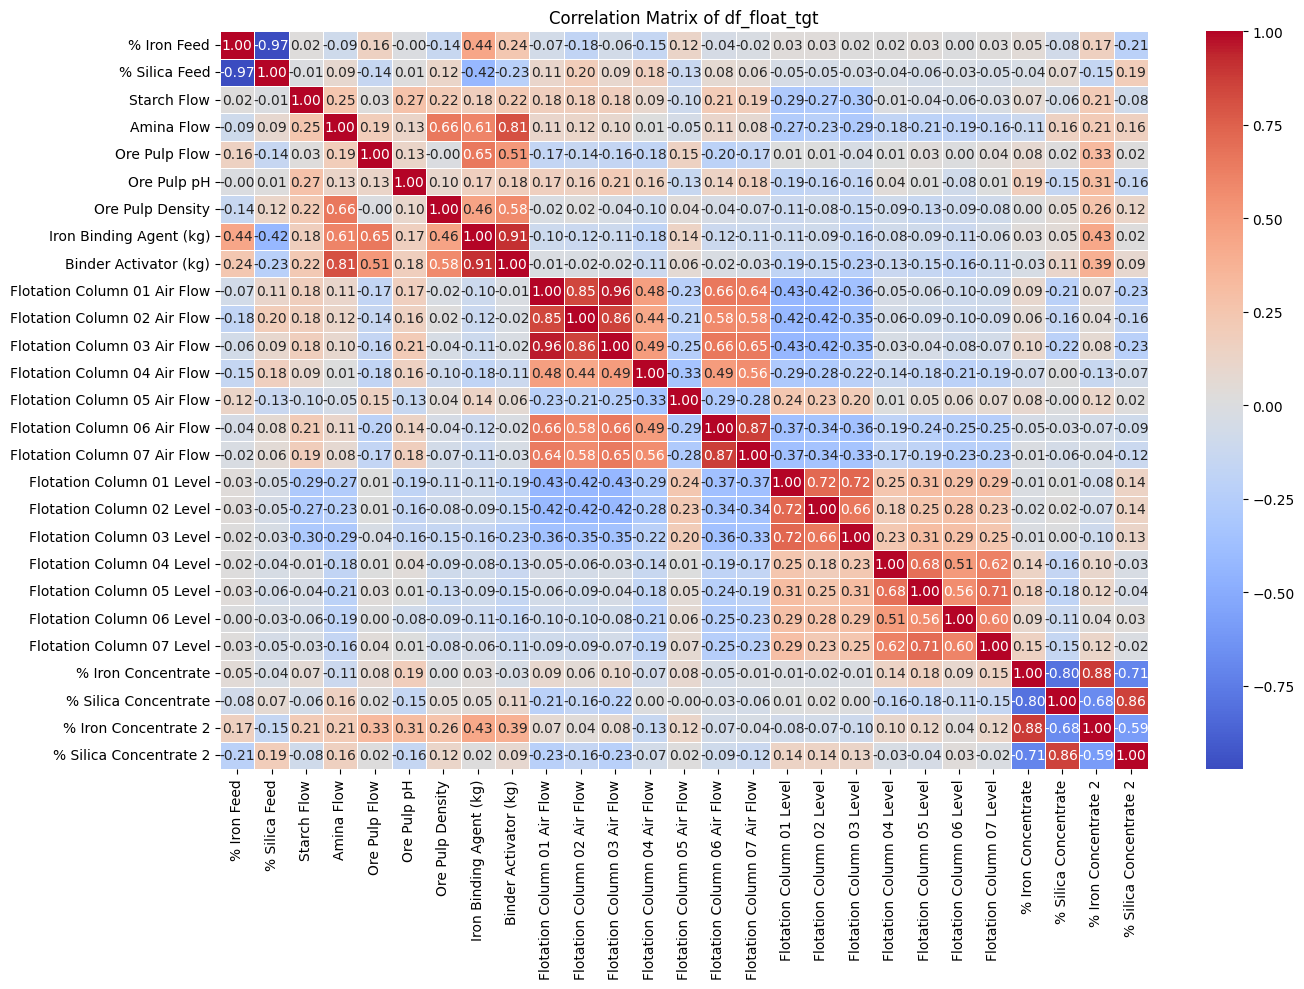

In [92]:
plt.figure(figsize=(14, 10))
sns.heatmap(df_filtered_without_ts.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Add a title to the plot
plt.title('Correlation Matrix of df_float_tgt')

# Show the plot
plt.tight_layout()
plt.show()

In [93]:
df_filtered_without_ts.columns

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Iron Binding Agent (kg)', 'Binder Activator (kg)',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate', '% Iron Concentrate 2',
       '% Silica Concentrate 2'],
      dtype='object')

Not to impute columns: % Iron Feed', '% Silica Feed', '% Iron Concentrate', '% Silica Concentrate', '% Iron Concentrate 2', '% Silica Concentrate 2'

In [97]:
from sklearn.experimental import enable_iterative_imputer  # Enable iterative imputer
from sklearn.impute import IterativeImputer
# Define the columns you want to exclude from imputation
exclude_columns = ['% Iron Feed', '% Silica Feed', '% Iron Concentrate', '% Silica Concentrate', '% Iron Concentrate 2',
       '% Silica Concentrate 2']
# Separate the columns to impute (exclude the specified columns)
columns_to_impute = [col for col in df_filtered_without_ts.columns if col not in exclude_columns]
# Initialize the IterativeImputer (MICE imputation)
imputer = IterativeImputer(max_iter=10, random_state=42)

# Apply imputation on the selected columns (those with missing values)
df_filtered_without_ts[columns_to_impute] = imputer.fit_transform(df_filtered_without_ts[columns_to_impute])

# Check if there are any missing values left
print(df_filtered_without_ts.isnull().sum())  # Check if there are still missing values
print(df_filtered_without_ts.head())  # Preview the imputed dataset

% Iron Feed                       0
% Silica Feed                     0
Starch Flow                       0
Amina Flow                        0
Ore Pulp Flow                     0
Ore Pulp pH                       0
Ore Pulp Density                  0
Iron Binding Agent (kg)           0
Binder Activator (kg)             0
Flotation Column 01 Air Flow      0
Flotation Column 02 Air Flow      0
Flotation Column 03 Air Flow      0
Flotation Column 04 Air Flow      0
Flotation Column 05 Air Flow      0
Flotation Column 06 Air Flow      0
Flotation Column 07 Air Flow      0
Flotation Column 01 Level         0
Flotation Column 02 Level         0
Flotation Column 03 Level         0
Flotation Column 04 Level         0
Flotation Column 05 Level         0
Flotation Column 06 Level         0
Flotation Column 07 Level         0
% Iron Concentrate                0
% Silica Concentrate              0
% Iron Concentrate 2              0
% Silica Concentrate 2          169
dtype: int64
   % Iron Feed 

In [98]:
df_filtered_without_ts.shape

(703764, 27)

In [99]:
df_filtered_ts = df_filtered[['ts']]

In [100]:
df_filtered_ts.shape

(703764, 1)

In [101]:
df_filtered_imputed_with_ts = pd.concat([df_filtered_ts, df_filtered_without_ts], axis=1)

In [102]:
df_filtered_imputed_with_ts.shape

(703764, 28)